#Problem Statement
A bank is trying to get more people to apply for personal loans. Using the dataset provided by them, which is based of the previous year when they were offering loans packages, they want me to check which of their current  and future customers would be interested in acquiring a personal loan and how to make this option attractive and available to them.

More people applying for personal loans will aenable them to generate more revenue in the form of interest and loan fees. They'll also be able to attract new customers and strengthen relationship with exisitng customers and increase their loyalty.

The data provided by them contains information about the previous customers who have applied for personal loans based on the previous campaign they ran versus those who didn't apply. I'll use this information to find a link and create a pipeline to determine the type of customers they should promote thier services to them and how to make taking the loan attractive to them.

The source for the dataset is linked below:
https://www.kaggle.com/datasets/krantiswalke/bank-personal-loan-modelling

#Data Pre-processing

After importing the necessary libraries, I upload thecsv file using
.read_csv. I check for null values and got their sum. There were no null values. And I used .shape to check how many rows and columns which is 5000 rows and 14 columns.

In [108]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [110]:
df.shape

(5000, 14)

In [111]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

#Data Visualisation

Using the matplotlib and seaborn libraries, I visualised the data by comparing them to the personal loan to see their relationships and get insights into the data.

The first graph shows that less people applied for the loan vs those who didn't. This is very imbalanced.

Using Personal Loan as the Identifyer, I compared the following columns Family, Age, Experience and Zip code to it.

0 = didnt apply for loan(blue)
1 = applied for loan(orange)

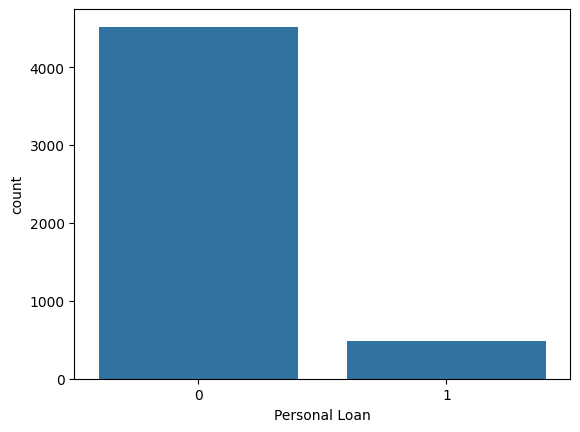

In [113]:
#checking the rate of those for applied for loans vs those who didnt
sns.countplot(x  = df['Personal Loan'])
plt.show()
#note: imbalanced

<Axes: xlabel='Family', ylabel='count'>

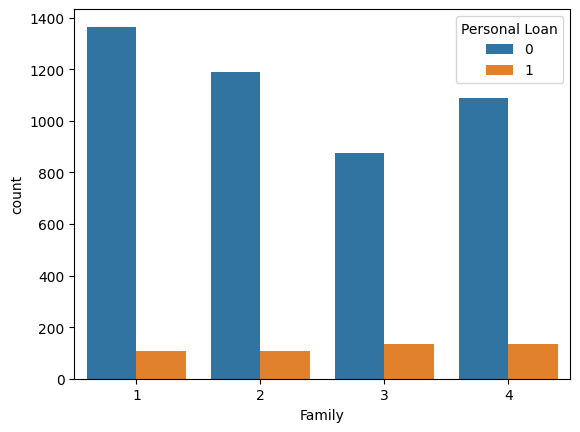

In [114]:
sns.countplot(x= 'Family', hue = 'Personal Loan', data = df)

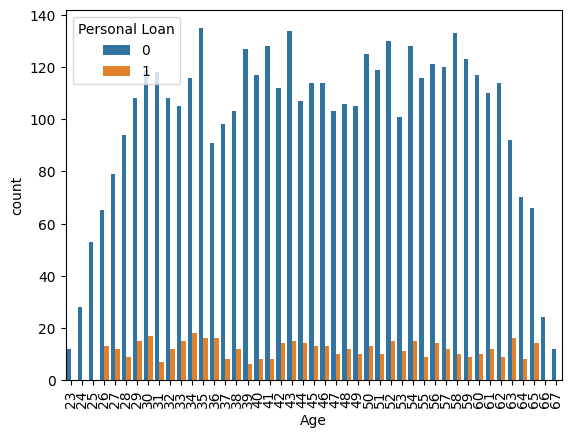

In [116]:
sns.countplot(x = 'Age', hue = 'Personal Loan', data = df)
plt.xticks(rotation = 90)
plt.show()

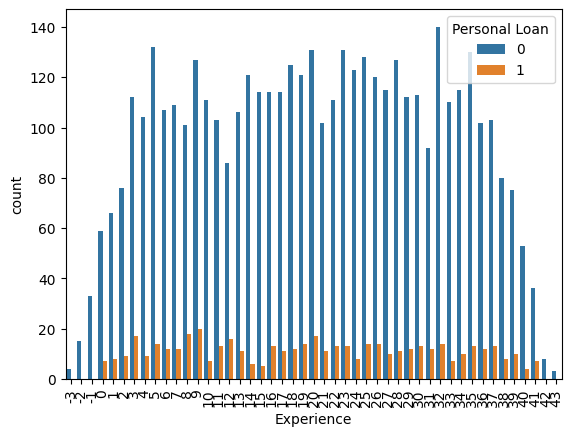

In [117]:
sns.countplot(x = 'Experience', hue = 'Personal Loan', data = df)
plt.xticks(rotation = 90)
plt.show()

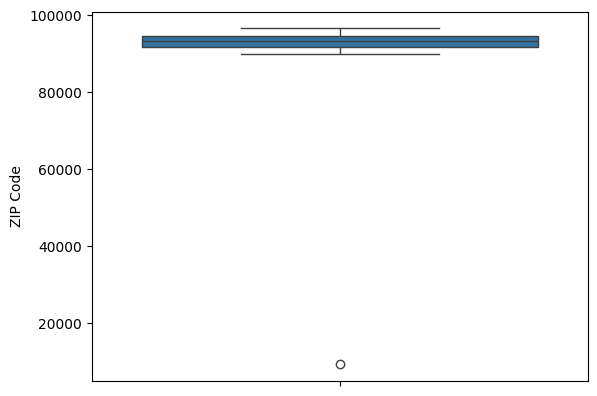

In [118]:
sns.boxplot(df['ZIP Code'])
plt.show()

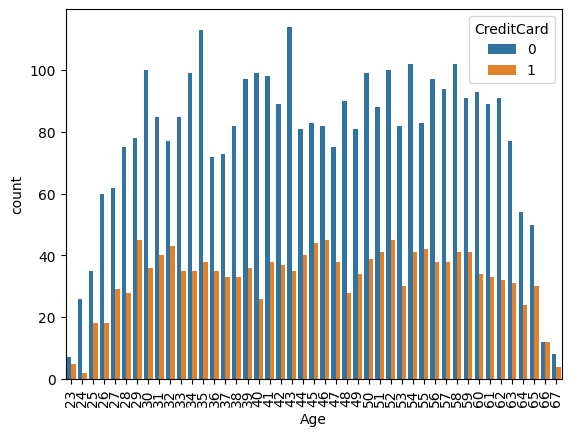

In [119]:
sns.countplot( x = 'Age', hue = 'CreditCard', data = df)
plt.xticks(rotation = 90)
plt.show()

#Data Processing

After visualising the data, I've decided to drop the ID column, the model wont learn anything from it. From the above boxplot, we can see that there isnt any postal code below 90000. Using that as the margin, I'll only be including zipcode information 90000 and above.

I defined X and y variable, including everthing in the X variable except the Personal Loans and ket that as the y variable

I decided to oversample the data because if I undersample it, I won't be left with much data to train my model on. Resample increased the data from 4999 rows to 9038 rows.

In [120]:
from imblearn.over_sampling import RandomOverSampler

In [121]:
df.drop('ID', axis = 1, inplace = True)

In [122]:
df.drop(df[df['ZIP Code']<20000].index, inplace = True)

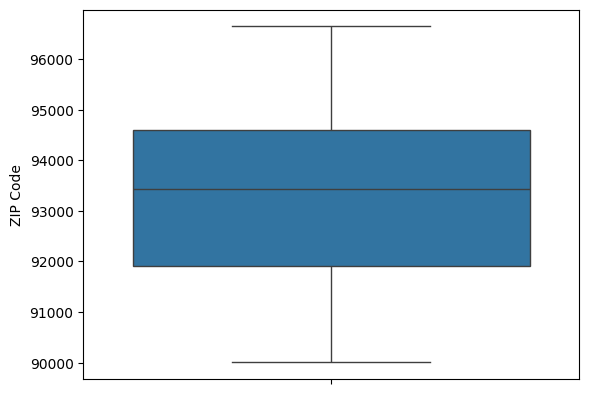

In [123]:
#graph more visible after dropping
sns.boxplot(df['ZIP Code'])
plt.show()

In [124]:
X = df. drop('Personal Loan', axis = 1)
y = df['Personal Loan']

In [125]:
X.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,1


In [126]:
X.shape

(4999, 12)

In [127]:
y.shape

(4999,)

In [128]:
sample = RandomOverSampler()
X, y = sample.fit_resample(X,y)
X.shape

(9038, 12)

In [130]:
print(X.shape)
print(y.shape)

(9038, 12)
(9038,)


#Splitting Dataset

Using the train_test_split function, I'll be creating a train, test and validation set. The validation set will be used to check how much the model has learned during the training before introducing it to the test set.

I chose test size .25 at random.

I'm also scaling the X_train, X_test, and X_valid to make them all fit within the same scale. ONly the X_train has been fit_transformed so that what ever is leanred from that can be used to transform the X_test and X_valid. This scaling will only affect the following columns Age, Experience, Income, Zipcode, Family, Education and CCAVg. The rest will remain as they are.

In [131]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25)
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size = 0.25)

In [133]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_valid = scaler.transform(X_valid)

#Modelling
After importing the necessary libraries and the Sequential model. I imported the layers Dense, Flatten and Dropout and the activaton functions LeakyReLU and PReLU.

I chose to only run four models and compare them.

Created an early_stopping variable and set it to monitor val_loss and gave it a patience of 20. This is so that if the val_loss remains the same during the training then after 20 seconds, it should automatically stop running.

When training the models, the batch size is set to 30 and no of epochs 500.

For the first model: the metrics was initiall set to accuracy, but when it started running the accuracy started with  60% and gradually went down to 20. val_accuracy was also low. So I switched it to binary_accuracy and it worked in reverse, starting with 80% and steadly going higher.
These were the values after trianing :
1. loss: 0.0221
2. binary_accuracy: 0.9944
3. val_loss: 0.0587
4. val_binary_accuracy: 0.980

Module 2: Kept it same but increased the number of unit in the dense layer, and introduced another dense layer and set activation to keras.layers.LeakyReLU(alpha=0.03).
These were the values after trianing :
1. loss: 0.0018
2. binary_accuracy: 0.9997
3. val_loss: 0.0470
4. val_binary_accuracy: 0.9909

Module 3: this was left the same as module 3 but I introduced a dropout layer and set it to 0.25% and changed the optimizer from adam to rmsprop.
These were the values after trianing :
1. loss: 0.0122
2. binary_accuracy: 0.9965
3. val_loss: 0.0543
4. val_binary_accuracy: 0.9920

Module 4: For this I introduced another layer dense layer with activation keras.layers.LeakyReLU(alpha=0.02).
These were the values after trianing :
1. loss: 0.0177
2. binary_accuracy: 0.9970
3. val_loss: 0.0481
4. val_binary_accuracy: 0.9898

I'll be plotting the loss, val_loss, val_binary_accuracy and binary_accuracy od module two since it has the lowest loss. Their Binary accuracy are all in 99 but that of module2 is much higher, almost reach a 100 if rounded up.

In [134]:
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import LeakyReLU, PReLU
from tensorflow.keras.layers import Dropout

In [148]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', mode = 'auto', patience = 20 )

In [135]:
mod1 = Sequential()
mod1.add(Dense(units = 14, input_shape = (12,), activation = 'relu'))
mod1.add(Dense(units = 10,  activation = 'relu'))
mod1.add(Dense(units = 6, activation = 'relu'))
mod1.add(Dense(units = 2,  activation = 'sigmoid'))
mod1.add(Flatten())
mod1.compile(loss='binary_crossentropy', optimizer = 'adam', metrics = ['binary_accuracy'])
mod1.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_67 (Dense)            (None, 14)                182       
                                                                 
 dense_68 (Dense)            (None, 10)                150       
                                                                 
 dense_69 (Dense)            (None, 6)                 66        
                                                                 
 dense_70 (Dense)            (None, 2)                 14        
                                                                 
 flatten_13 (Flatten)        (None, 2)                 0         
                                                                 
Total params: 412 (1.61 KB)
Trainable params: 412 (1.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [136]:
hist1 = mod1.fit(X_train, y_train, epochs = 500, validation_data = (X_valid, y_valid), batch_size = 30, callbacks = early_stopping)

Epoch 1/500
226/226 [==============================] - 2s 4ms/step - loss: 0.5857 - binary_accuracy: 0.6884 - val_loss: 0.3800 - val_binary_accuracy: 0.8562
Epoch 2/500
226/226 [==============================] - 1s 3ms/step - loss: 0.2398 - binary_accuracy: 0.9121 - val_loss: 0.2017 - val_binary_accuracy: 0.9199
Epoch 3/500
226/226 [==============================] - 1s 3ms/step - loss: 0.1727 - binary_accuracy: 0.9321 - val_loss: 0.1649 - val_binary_accuracy: 0.9321
Epoch 4/500
226/226 [==============================] - 1s 3ms/step - loss: 0.1482 - binary_accuracy: 0.9411 - val_loss: 0.1399 - val_binary_accuracy: 0.9451
Epoch 5/500
226/226 [==============================] - 1s 3ms/step - loss: 0.1299 - binary_accuracy: 0.9506 - val_loss: 0.1274 - val_binary_accuracy: 0.9493
Epoch 6/500
226/226 [==============================] - 1s 3ms/step - loss: 0.1176 - binary_accuracy: 0.9586 - val_loss: 0.1120 - val_binary_accuracy: 0.9619
Epoch 7/500
226/226 [==============================] - 1s 

In [137]:
mod2 = Sequential()
mod2.add(Dense(units = 24, input_shape = (12,), activation = 'relu'))
mod2.add(Dense(units = 15,  activation = 'relu'))
mod2.add(Dense(units = 10,  activation = keras.layers.LeakyReLU(alpha=0.03)))
mod2.add(Dense(units = 9, activation = 'relu'))
mod2.add(Dense(units = 2,  activation = 'sigmoid'))
mod2.add(Flatten())
mod2.compile(loss='binary_crossentropy', optimizer = 'adam', metrics = ['binary_accuracy'])
mod2.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_71 (Dense)            (None, 24)                312       
                                                                 
 dense_72 (Dense)            (None, 15)                375       
                                                                 
 dense_73 (Dense)            (None, 10)                160       
                                                                 
 dense_74 (Dense)            (None, 9)                 99        
                                                                 
 dense_75 (Dense)            (None, 2)                 20        
                                                                 
 flatten_14 (Flatten)        (None, 2)                 0         
                                                                 
Total params: 966 (3.77 KB)
Trainable params: 966 (3.

In [138]:
hist2 = mod2.fit(X_train, y_train, epochs = 500, validation_data = (X_valid, y_valid), batch_size = 30, callbacks = early_stopping)

Epoch 1/500
226/226 [==============================] - 2s 4ms/step - loss: 0.4414 - binary_accuracy: 0.7877 - val_loss: 0.2186 - val_binary_accuracy: 0.9186
Epoch 2/500
226/226 [==============================] - 1s 3ms/step - loss: 0.1662 - binary_accuracy: 0.9357 - val_loss: 0.1437 - val_binary_accuracy: 0.9502
Epoch 3/500
226/226 [==============================] - 1s 3ms/step - loss: 0.1227 - binary_accuracy: 0.9577 - val_loss: 0.1183 - val_binary_accuracy: 0.9611
Epoch 4/500
226/226 [==============================] - 1s 3ms/step - loss: 0.1064 - binary_accuracy: 0.9657 - val_loss: 0.1058 - val_binary_accuracy: 0.9648
Epoch 5/500
226/226 [==============================] - 1s 3ms/step - loss: 0.0966 - binary_accuracy: 0.9686 - val_loss: 0.0993 - val_binary_accuracy: 0.9650
Epoch 6/500
226/226 [==============================] - 1s 3ms/step - loss: 0.0905 - binary_accuracy: 0.9703 - val_loss: 0.1058 - val_binary_accuracy: 0.9602
Epoch 7/500
226/226 [==============================] - 1s 

In [139]:
mod3 = Sequential()
mod3.add(Dense(units = 24, input_shape = (12,), activation = 'relu'))
mod3.add(Dense(units = 15,  activation = 'relu'))
mod3.add(Dense(units = 10,  activation = keras.layers.LeakyReLU(alpha=.03)))
mod3.add(Dense(units = 9, activation = 'relu'))
mod3.add(Dropout(0.25))
mod3.add(Dense(units = 2,  activation = 'sigmoid'))
mod3.add(Flatten())
mod3.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics = ['binary_accuracy'])
mod3.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_76 (Dense)            (None, 24)                312       
                                                                 
 dense_77 (Dense)            (None, 15)                375       
                                                                 
 dense_78 (Dense)            (None, 10)                160       
                                                                 
 dense_79 (Dense)            (None, 9)                 99        
                                                                 
 dropout_3 (Dropout)         (None, 9)                 0         
                                                                 
 dense_80 (Dense)            (None, 2)                 20        
                                                                 
 flatten_15 (Flatten)        (None, 2)               

In [140]:
hist3 = mod3.fit(X_train, y_train, epochs = 500, validation_data = (X_valid, y_valid), batch_size = 30, callbacks = early_stopping)

Epoch 1/500
226/226 [==============================] - 2s 4ms/step - loss: 0.4866 - binary_accuracy: 0.8011 - val_loss: 0.3052 - val_binary_accuracy: 0.8861
Epoch 2/500
226/226 [==============================] - 1s 3ms/step - loss: 0.2500 - binary_accuracy: 0.9155 - val_loss: 0.2031 - val_binary_accuracy: 0.9228
Epoch 3/500
226/226 [==============================] - 1s 3ms/step - loss: 0.1815 - binary_accuracy: 0.9386 - val_loss: 0.1467 - val_binary_accuracy: 0.9487
Epoch 4/500
226/226 [==============================] - 1s 5ms/step - loss: 0.1485 - binary_accuracy: 0.9544 - val_loss: 0.1238 - val_binary_accuracy: 0.9635
Epoch 5/500
226/226 [==============================] - 1s 5ms/step - loss: 0.1268 - binary_accuracy: 0.9604 - val_loss: 0.1193 - val_binary_accuracy: 0.9513
Epoch 6/500
226/226 [==============================] - 1s 4ms/step - loss: 0.1115 - binary_accuracy: 0.9655 - val_loss: 0.1002 - val_binary_accuracy: 0.9688
Epoch 7/500
226/226 [==============================] - 1s 

In [141]:
mod4 = Sequential()
mod4.add(Dense(units = 24, input_shape = (12,), activation = 'relu'))
mod4.add(Dense(units = 15,  activation = keras.layers.LeakyReLU(alpha=.03)))
mod4.add(Dense(units = 10,  activation = keras.layers.LeakyReLU(alpha=.02)))
mod4.add(Dense(units = 9, activation = 'relu'))
mod4.add(Dropout(0.25))
mod4.add(Dense(units = 2,  activation = 'sigmoid'))
mod4.add(Flatten())
mod4.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics = ['binary_accuracy'])
mod4.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_81 (Dense)            (None, 24)                312       
                                                                 
 dense_82 (Dense)            (None, 15)                375       
                                                                 
 dense_83 (Dense)            (None, 10)                160       
                                                                 
 dense_84 (Dense)            (None, 9)                 99        
                                                                 
 dropout_4 (Dropout)         (None, 9)                 0         
                                                                 
 dense_85 (Dense)            (None, 2)                 20        
                                                                 
 flatten_16 (Flatten)        (None, 2)               

In [142]:
hist4 = mod4.fit(X_train, y_train, epochs = 500, validation_data = (X_valid, y_valid), batch_size = 30, callbacks = early_stopping)

Epoch 1/500
226/226 [==============================] - 2s 5ms/step - loss: 0.5642 - binary_accuracy: 0.7195 - val_loss: 0.4416 - val_binary_accuracy: 0.8595
Epoch 2/500
226/226 [==============================] - 1s 3ms/step - loss: 0.3921 - binary_accuracy: 0.8962 - val_loss: 0.3727 - val_binary_accuracy: 0.9022
Epoch 3/500
226/226 [==============================] - 1s 3ms/step - loss: 0.3381 - binary_accuracy: 0.9146 - val_loss: 0.3253 - val_binary_accuracy: 0.9232
Epoch 4/500
226/226 [==============================] - 1s 3ms/step - loss: 0.2913 - binary_accuracy: 0.9314 - val_loss: 0.2763 - val_binary_accuracy: 0.9456
Epoch 5/500
226/226 [==============================] - 1s 3ms/step - loss: 0.2465 - binary_accuracy: 0.9509 - val_loss: 0.2309 - val_binary_accuracy: 0.9628
Epoch 6/500
226/226 [==============================] - 1s 3ms/step - loss: 0.2080 - binary_accuracy: 0.9621 - val_loss: 0.1962 - val_binary_accuracy: 0.9655
Epoch 7/500
226/226 [==============================] - 1s 

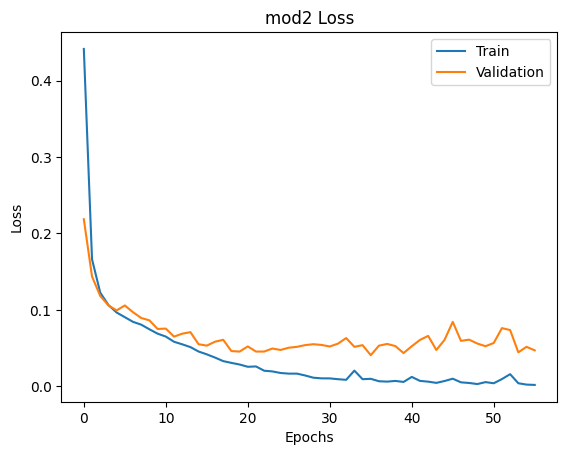

In [143]:
#plotting loss and val_loss
plt.plot(hist2.history['loss'])
plt.plot(hist2.history['val_loss'])
plt.title("mod2 Loss")
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', "Validation"], loc = 'upper right')
plt.show()

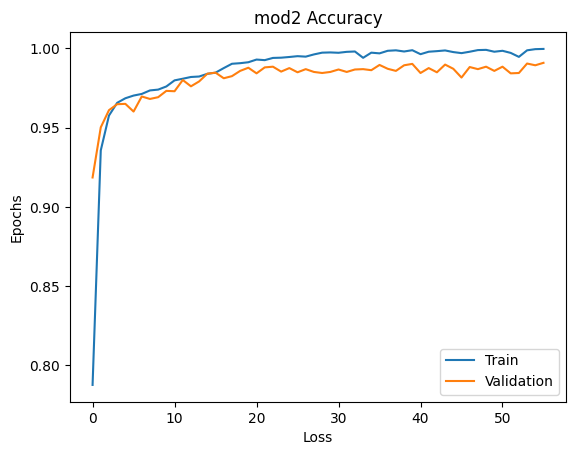

In [145]:
plt.plot(hist2.history['binary_accuracy'])
plt.plot(hist2.history['val_binary_accuracy'])
plt.title("mod2 Accuracy")
plt.xlabel('Loss')
plt.ylabel('Epochs')
plt.legend(['Train', "Validation"], loc = 'lower right')
plt.show()
#placed lower right. was blocking lines

#Evaluating the Module
Evaluatig module 2 with the test dataset to check performance.

We can see the model performed very well and gave an accuracy of 99.6% and a loss of 1.98 %.

In [146]:
hist_test =mod2.evaluate(X_test, y_test)
#RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

71/71 [==============================] - 1s 7ms/step - loss: 0.0198 - binary_accuracy: 0.9965


In [147]:
print("Accuracy of the testing data:", hist_test[1])
print("Loss of the testing data:", hist_test[0])

Accuracy of the testing data: 0.9964601993560791
Loss of the testing data: 0.01984420046210289


#Conclusion
The model learned well on the training and performed very well on the test dataset.

*Recommendation
1. Can offer the interest payment to start 2 years after receiving the loan
2. Personalise Loan offers
3. Improve loan application process by making the wait period for result shorter
4. Run targetted ads to attract new customers

#References:

1. Walke, K. (2020) “Bank_Personal_Loan_Modelling.”

2. (No date). Available at: http://#https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping (Accessed: April 16, 2024).

3. Seaborn.Boxplot — seaborn 0.13.2 documentation (no date) Pydata.org. Available at: https://seaborn.pydata.org/generated/seaborn.boxplot.html (Accessed: April 16, 2024).

4. Training & evaluation with the built-in methods (no date) TensorFlow. Available at: https://www.tensorflow.org/guide/keras/training_with_built_in_methods (Accessed: April 16, 2024).




#Assessment Form
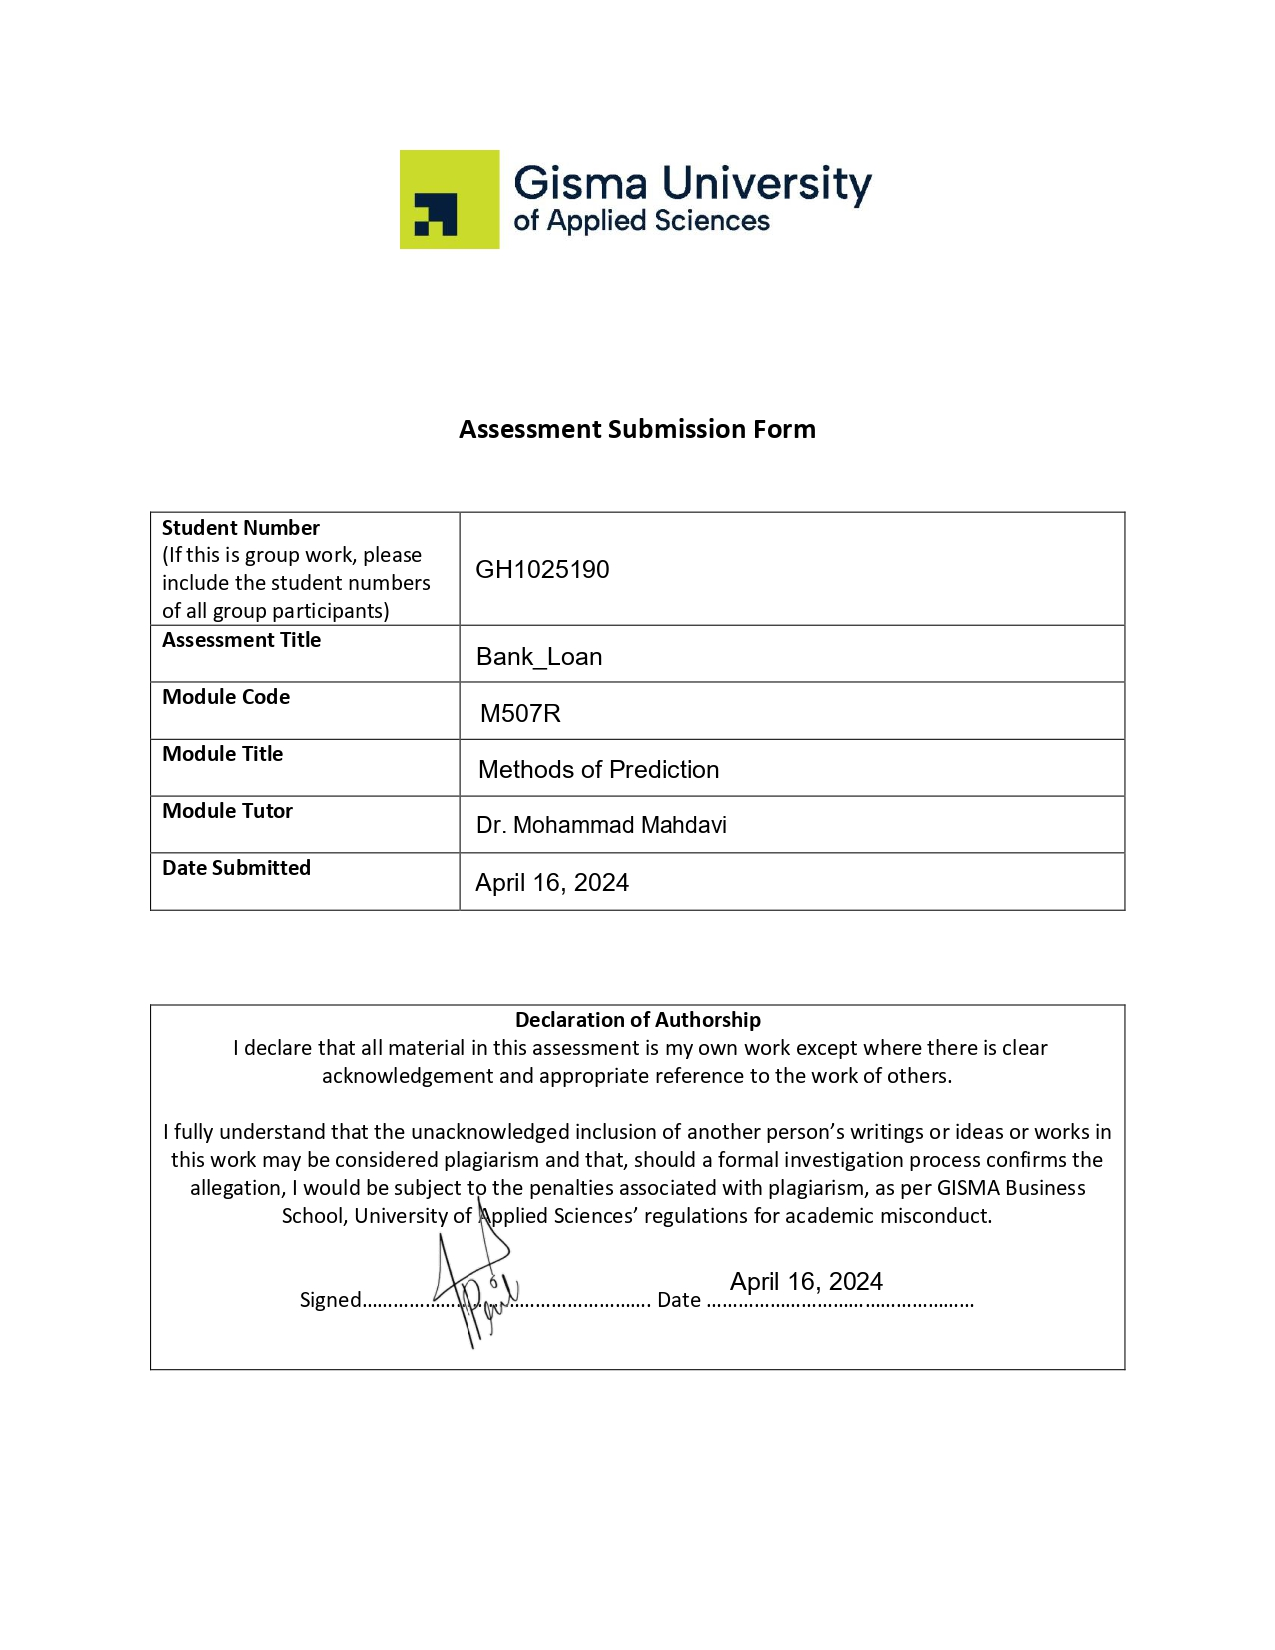

